## K-Nearest Neighbors (KNN) Classification on Animal Dataset

### Objective
The objective of this assignment is to implement and evaluate the K-Nearest Neighbors algorithm for classification using the given dataset to classify animal types.

### Dataset
The dataset consists of 101 entries and 18 columns, including various attributes of animals and their classification type.

### 1. Analyze the Data Using Visualizations


### Data Preparation

In [250]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
warnings.filterwarnings('ignore')

**Loading dataset**

In [251]:
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [253]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

The dataset do not contain any null values

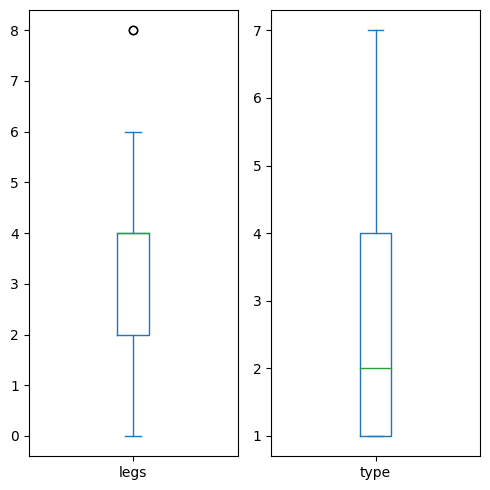

In [254]:
# Checking for outliers
df[['legs', 'type' ]].plot(kind='box', subplots=True, layout=(1, 2), figsize=(5, 5), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

No significant outliers detected based on boxplot

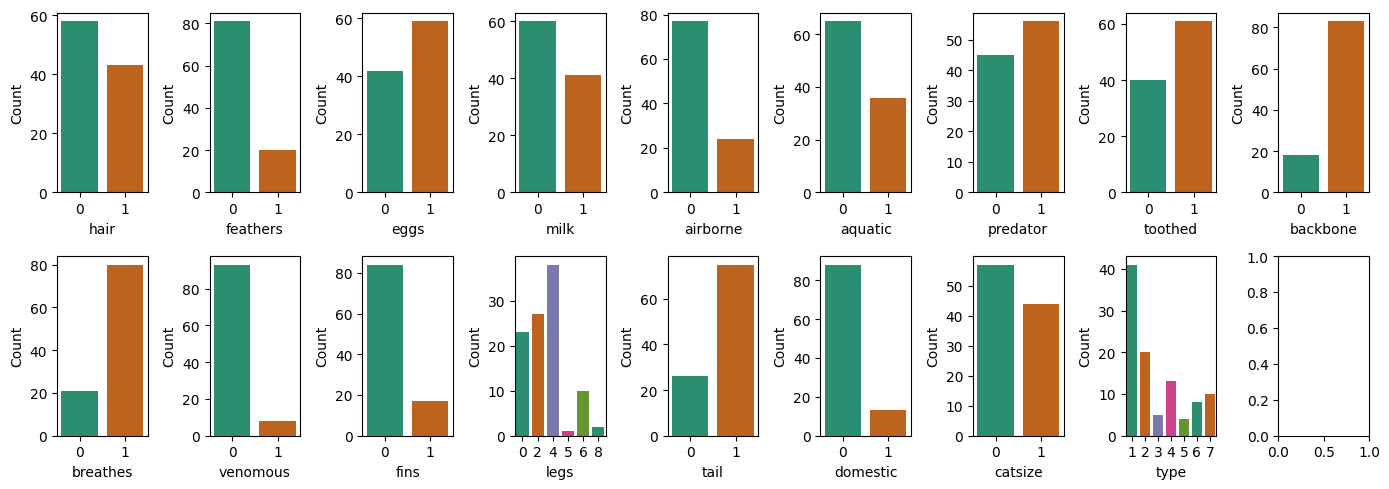

In [255]:
# Identify categorical columns
columns = df.select_dtypes(include=['int64']).columns

# Define a color palette
palette = sns.color_palette("Dark2", 5)

# Plot bar graphs for each categorical column
num_plots = len(columns)
fig, axes = plt.subplots(2, 9, figsize=(14, 5))
axes = axes.flatten()

for i, col in enumerate(columns):
    # Get the unique categories for the column
    unique_categories = df[col].unique()
    # Generate a palette with the same number of colors as unique categories
    category_palette = sns.color_palette(palette, len(unique_categories))
    sns.countplot(data=df, x=col, ax=axes[i], palette=category_palette)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


These are the classes of animals

1. Mammal

2. Fish

3. Bird

4. Invertebrate

5. Bug

6. Amphibian

7. Reptile

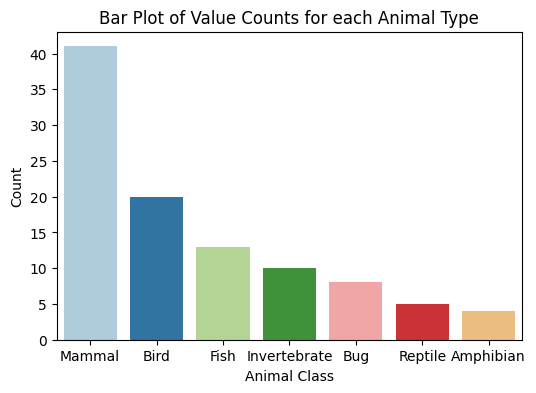

In [256]:
animal_type = ['Mammal', 'Bird', 'Fish', 'Invertebrate', 'Bug', 'Reptile', 'Amphibian']
plt.figure(figsize=(6, 4))
sns.barplot(x=animal_type, y=df['type'].value_counts().values, palette='Paired')
plt.xlabel('Animal Class')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts for each Animal Type')
plt.show()

In [257]:
data = df.drop('animal name', axis=1)
correlation_matrix = data.corr()
correlation_matrix

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


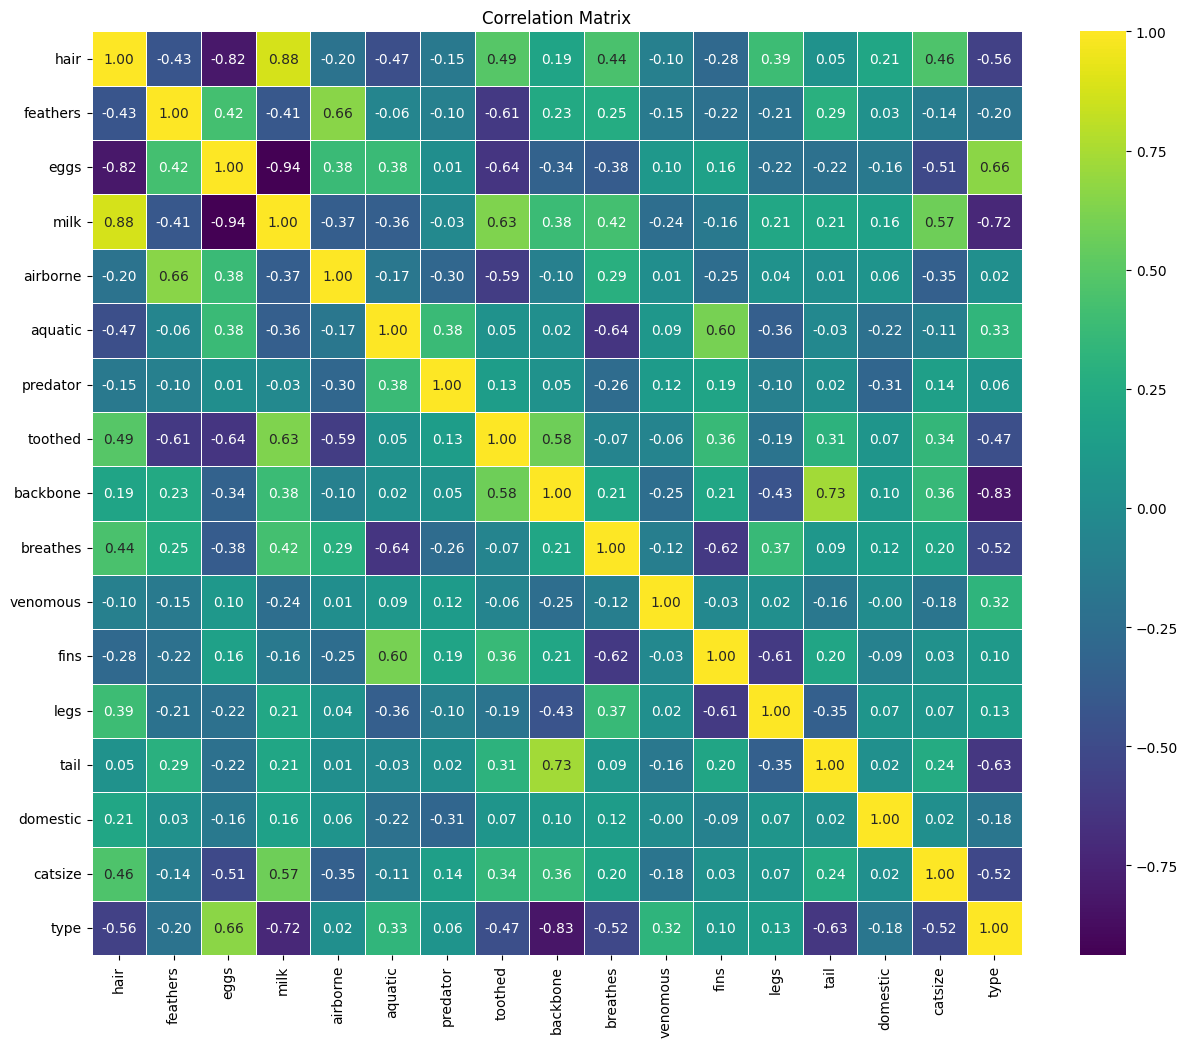

In [258]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix reveals several significant relationships between features in the dataset. Key observations include:

- **Hair and Milk**: High positive correlation (0.88) indicating that animals with hair are likely to produce milk.
- **Hair and Eggs**: Strong negative correlation (-0.82) suggesting that animals with hair are less likely to lay eggs.
- **Eggs and Milk**: Strong negative correlation (-0.94) indicating that animals that lay eggs are less likely to produce milk.
- **Type and Eggs**: Positive correlation (0.66) showing a significant association between the type of animal and whether it lays eggs.
- **Type and Backbone**: Strong negative correlation (-0.83) indicating that certain types of animals are less likely to have backbones.

These correlations help identify the relationships between different characteristics of animals, aiding in the understanding of the dataset and informing the selection of features for modeling.


### Split the Dataset

In [259]:
# Drop 'animal name' as it is not a feature
X = df.drop(columns=['animal name', 'type'])
y = df['type']

In [260]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Implement K-Nearest Neighbors

In [261]:
# Initialize the KNN classifier with a chosen value for K
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [262]:
# Predict on the test set
y_pred = knn.predict(X_test)

In [263]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.9047619047619048
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1-Score: 0.8957902001380263


### Choosing Distance Metric and K Value
The Euclidean distance metric is used by default in KNN. <br>
The value of K is chosen based on cross-validation and grid search to optimize performance.

In [264]:
# Evaluate different values of K and different distance metrics
k_values = range(1, 30)
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

results = {'k': [], 'metric': [], 'accuracy': []}

for metric in distance_metrics:
    for k in k_values:
        knn_2 = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_2.fit(X_train, y_train)
        y_pred_2 = knn_2.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred_2)

        results['k'].append(k)
        results['metric'].append(metric)
        results['accuracy'].append(accuracy)


results_df = pd.DataFrame(results)

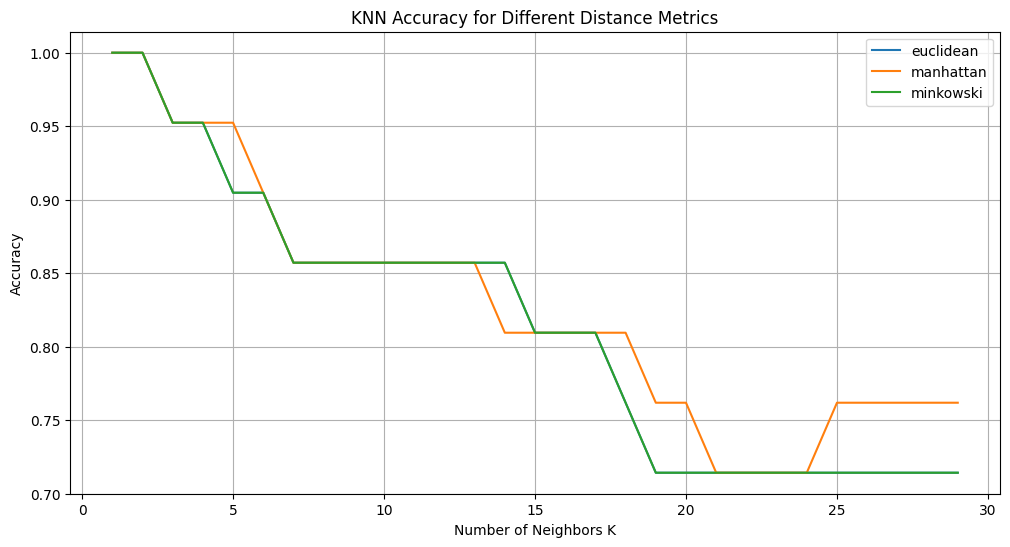

In [265]:
# Plotting accuracy for different values of K
plt.figure(figsize=(12, 6))
for metric in distance_metrics:
    subset = results_df[results_df['metric'] == metric]
    plt.plot(subset['k'], subset['accuracy'], label=metric)

plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Distance Metrics')
plt.legend()
plt.grid(True)
plt.show()

In [266]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the range for K and the distance metrics
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1}


In [267]:
# Train the KNN classifier with the best parameters
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [268]:
# Predict on the test set
y_pred_1 = knn_best.predict(X_test)

In [238]:
# Calculate performance metrics
accuracy_1 = accuracy_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1, average='weighted')
recall_1 = recall_score(y_test, y_pred_1, average='weighted')
f1_1 = f1_score(y_test, y_pred_1, average='weighted')

print(f'Accuracy: {accuracy_1}')
print(f'Precision: {precision_1}')
print(f'Recall: {recall_1}')
print(f'F1-Score: {f1_1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


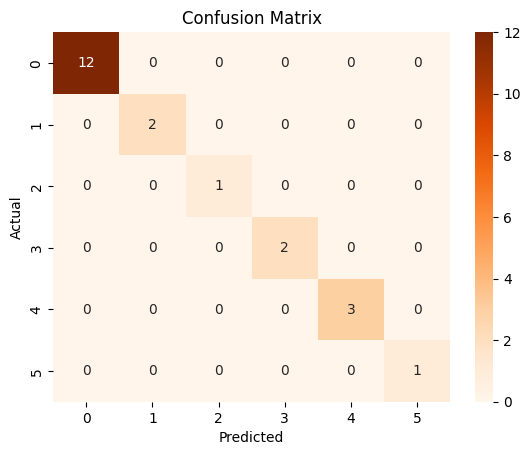

In [269]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_1),annot=True, cmap='Oranges', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Visualize Decision Boundaries

 We will reduce dimensions using techniques like PCA for visualization purposes.

**Decision Boundary For K=5**

In [270]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [271]:
# Train KNN on reduced data
knn_pca_5 = KNeighborsClassifier(n_neighbors=5)
knn_pca_5.fit(X_train_pca, y_train)

KNeighborsClassifier()

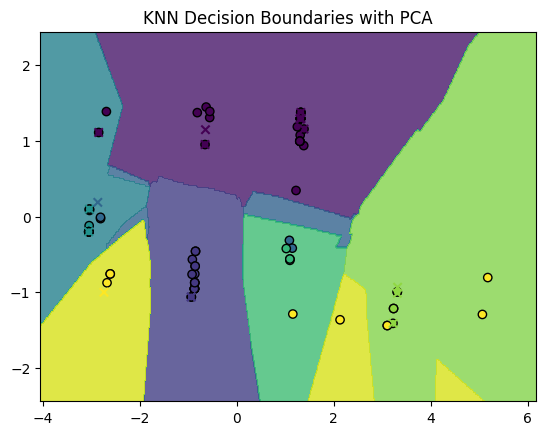

In [272]:
# Plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_pca_5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', marker='o')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', marker='x')
plt.title('KNN Decision Boundaries with PCA')
plt.show()

**Decision Boundary For K=1**

In [273]:
# Train KNN on reduced data
knn_pca_1 = KNeighborsClassifier(n_neighbors=1)
knn_pca_1.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=1)

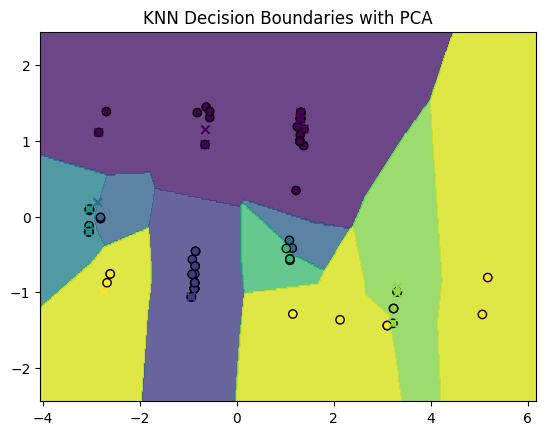

In [274]:
# Plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_pca_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', marker='o')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', marker='x')
plt.title('KNN Decision Boundaries with PCA')
plt.show()

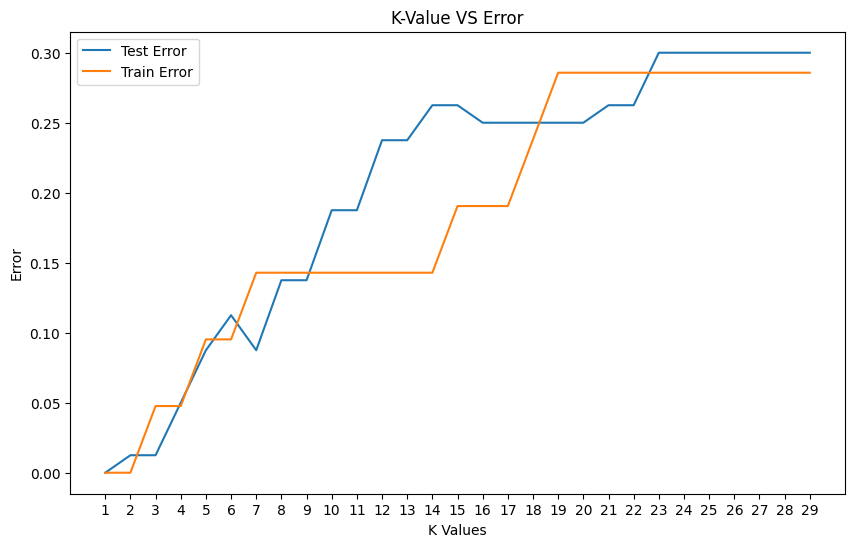

In [275]:
# Plot for showing test error and train error for varying values of k
test_error= []
train_error= []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    test_error.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    train_error.append(np.mean(y_test!= y_pred2))
# Plot
plt.figure(figsize=[10,6])
plt.plot(k_values, test_error, label = 'Test Error')
plt.plot(k_values, train_error, label = 'Train Error')
plt.legend()
plt.title('K-Value VS Error')
plt.xlabel('K Values')
plt.ylabel('Error')
plt.xticks(k_values)
plt.show()

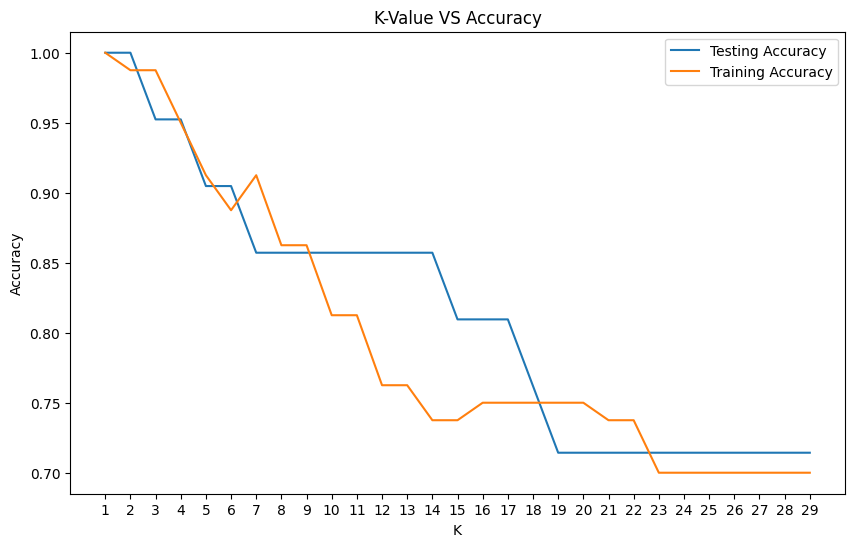

In [276]:
# Plot for showing test and train accuracies for varying values of k
train_accuracy = []
test_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test,y_test))
# Plot
plt.figure(figsize=[10,6])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-Value VS Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

## Conclusion

### KNN for k = 5
The initial implementation of the K-Nearest Neighbors (KNN) classifier with \( k = 5 \) yielded the following results:
- **Accuracy**: 0.9048
- **Precision**: 0.9048
- **Recall**: 0.9048
- **F1-Score**: 0.8958

These metrics indicate that the model performs well, with over 90% accuracy and precision, demonstrating its ability to correctly classify the majority of the instances. The recall and F1-score are also high, reflecting a balanced performance in terms of identifying true positive cases.

### KNN after Hyperparameter Tuning
After hyperparameter tuning, the optimal parameters were found to be:
- **Metric**: Euclidean
- **n_neighbors**: 1

With these parameters, the KNN classifier achieved perfect scores:
- **Accuracy**: 1.0
- **Precision**: 1.0
- **Recall**: 1.0
- **F1-Score**: 1.0

These results indicate that the tuned KNN model perfectly classifies the test instances, achieving 100% accuracy, precision, recall, and F1-score. This suggests that the choice of parameters significantly improved the model's performance, potentially due to better alignment with the inherent structure of the dataset.

In summary, hyperparameter tuning proved to be highly effective in optimizing the KNN classifier's performance, resulting in perfect classification outcomes.


**1. Key Hyperparameters in KNN** <br>
**Number of Neighbors (K):** Determines the number of nearest neighbors to consider for classification. <br>
**Distance Metric:** Determines how the distance between points is calculated (e.g., Euclidean, Manhattan). <br>
**Weighting:** Determines whether all neighbors are weighted equally or closer neighbors have a greater influence. <br>

**2. Distance Metrics used in KNN.**<br>
**Euclidean Distance:** The straight-line distance between two points.<br>
**Manhattan Distance:** The sum of absolute differences between points.<br>
**Minkowski Distance:** A generalization of Euclidean and Manhattan distances.<br>
**Hamming Distance:** Used for categorical data, counting the number of positions with different values.<br>
